# Job Application Data Analysis

**Author Name:** Mr. Muhammad Shahid Sardar\
**Email:** MrMShahidSardar@gmail.com\
**Portfolio:** [https://mrmshahidsardar.github.io/](https://mrmshahidsardar.github.io/) 

**Years of Data:**
1. 2024 

### Project Name: Job Application Trends and Success Analysis in Germany

#### Project Description:
This project aims to analyze personal job applications for positions such as Data Analyst, Data Scientist, and IT System Engineer across various states in Germany. The dataset includes details like application serial numbers, submission dates, states, job types, technology roles, job titles, companies, job portals (LinkedIn/StepStone), submission methods (company website or other), versions of CVs and cover letters, and current application statuses. The primary objectives are to identify trends, assess successful application strategies, and improve the overall job search process.

### Key Features:
- **Trend Analysis**: Identify trends in job applications over time by state and company.
- **Success Rate Assessment**: Evaluate which submission methods and job portals yield the highest success rates.
- **Document Version Comparison**: Analyze the effectiveness of different versions of CVs and cover letters.
- **Role-Specific Insights**: Compare application success across various job titles (e.g., Data Analyst, Data Scientist).
- **Geographic Insights**: Explore how application success varies by state.

### Data Usage:
The project will utilize the dataset to:
- Generate visualizations to illustrate application trends and success rates.
- Perform statistical analysis to determine factors contributing to successful applications.
- Create a dashboard for ongoing tracking of job applications and their statuses.

This comprehensive analysis will provide actionable insights for job seekers to optimize their application strategies and improve their chances of success in the competitive job market in Germany.

In [108]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings
warnings.filterwarnings('ignore')

In [109]:
# load the data
df = pd.read_excel('./01_pandas_tips_tricks/job.xlsx')
df.head()

,S.No,Date,State,Job Type,Tech Job,Job Title,Company,Job Portal,On Company Website,CV Used,CV Version,Cover Letter Used,Cover Letter Version,Application Status
0,1,2024-08-15,Koln,Full Time,Technology,Mathematiker / Data Analyst,Verband der Privaten Krankenversicherung e.V.,StepStone,Yes,Yes,Shahid CV 1,Yes,Shahid Cover Latter 1,Pending
1,2,2024-08-15,Koln,Full Time,Technology,Pricing and Business Intelligence Specialist,MOTUL Deutschland GmbH,StepStone,Yes,Yes,Shahid CV 1,No,Not Required,Pending
2,3,2024-08-15,Loningen,Full Time,Technology,Junior Data Scientist,Remmers Gruppe AG,StepStone,Yes,Yes,Shahid CV 1,Yes,Shahid Cover Latter 2,Pending
3,4,2024-08-16,Berlin,Full Time,Technology,Senior Data Scientist,Tourlane GmbH,StepStone,Yes,Yes,Shahid CV 1,Yes,Shahid Cover Latter 3,Rejected
4,5,2024-08-16,"Koln,Munster",Full Time,Technology,Senior Consultant Data & Analytics,Adesso SE,StepStone,Yes,Yes,Shahid CV 1,No,Not Required,Pending


In [74]:
df.tail(1)

,S.No,Date,State,Job Type,Tech Job,Job Title,Company,Job Portal,On Company Website,CV Used,CV Version,Cover Letter Used,Cover Letter Version,Application Status
36,37,2024-09-24,Bornheim,Partially Remote,Technology,"Data Scientist KI, Schwerpunkt Logistik (gn)",HORNBACH Baumarkt AG,StepStone,No,Yes,Shahid CV 3,No,Not Required,Pending


In [104]:
# lets see all column names at once
df.columns

Index(['S.No', 'Date', 'State', 'Job Type', 'Tech Job', 'Job Title', 'Company',
       'Job Portal', 'On Company Website', 'CV Used', 'CV Version',
       'Cover Letter Used', 'Cover Letter Version', 'Application Status'],
      dtype='object')

In [9]:
# Check no of unique values in coulumns
df.nunique()

S.No                    37
Date                    14
State                   24
Job Type                 2
Tech Job                 1
Job Title               35
Company                 37
Job Portal               2
On Company Website       2
CV Used                  1
CV Version               3
Cover Letter Used        2
Cover Letter Version     6
Application Status       3
dtype: int64

In [105]:
# check dataframe shape
df.shape

(37, 14)

# Composition

In [11]:
# Explore the data (Compsotion)
df.info() # let's have a look on dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   S.No                  37 non-null     int64         
 1   Date                  37 non-null     datetime64[ns]
 2   State                 37 non-null     object        
 3   Job Type              37 non-null     object        
 4   Tech Job              37 non-null     object        
 5   Job Title             37 non-null     object        
 6   Company               37 non-null     object        
 7   Job Portal            37 non-null     object        
 8   On Company Website    37 non-null     object        
 9   CV Used               37 non-null     object        
 10  CV Version            37 non-null     object        
 11  Cover Letter Used     37 non-null     object        
 12  Cover Letter Version  37 non-null     object        
 13  Application Status    

In [12]:
# summary Statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
S.No,37.0,19.0,1.0,10.0,19.0,28.0,37.0,10.824355
Date,37,2024-08-31 22:03:14.594594560,2024-08-15 00:00:00,2024-08-17 00:00:00,2024-08-21 00:00:00,2024-09-21 00:00:00,2024-09-24 00:00:00,NaN


# Dealing With Missing Values

In [13]:
# find missing values/null values/NaNs
df.isnull().sum() / len(df) * 100 # percentage of missing values in a column

S.No                    0.0
Date                    0.0
State                   0.0
Job Type                0.0
Tech Job                0.0
Job Title               0.0
Company                 0.0
Job Portal              0.0
On Company Website      0.0
CV Used                 0.0
CV Version              0.0
Cover Letter Used       0.0
Cover Letter Version    0.0
Application Status      0.0
dtype: float64

<Axes: >

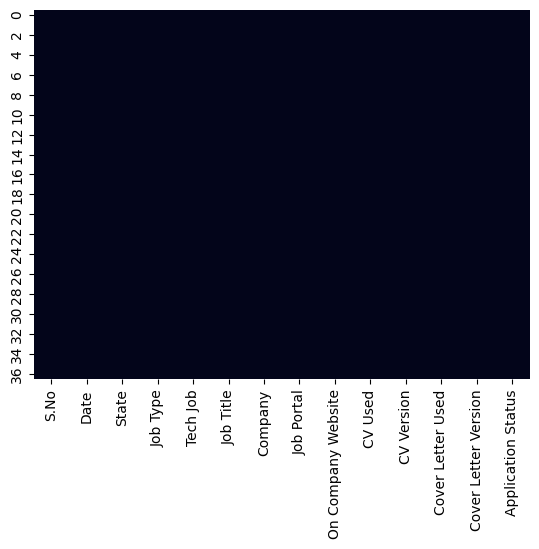

In [14]:
# plot the heatmap of missing values
sns.heatmap(df.isnull(), cbar=False)

# 1. "Descriptive Insights"

### 1.1 Top 5 States With Most Job Applications

In [15]:
# top 5 states with most job applications
df.groupby('State').count().sort_values('Job Title', ascending=False).head(5)

,S.No,Date,Job Type,Tech Job,Job Title,Company,Job Portal,On Company Website,CV Used,CV Version,Cover Letter Used,Cover Letter Version,Application Status
State,,,,,,,,,,,,,
Dusseldorf,4,4,4,4,4,4,4,4,4,4,4,4,4
Berlin,3,3,3,3,3,3,3,3,3,3,3,3,3
Koln,3,3,3,3,3,3,3,3,3,3,3,3,3
Bonn,3,3,3,3,3,3,3,3,3,3,3,3,3
Hamburg,3,3,3,3,3,3,3,3,3,3,3,3,3


<Figure size 1000x1000 with 0 Axes>

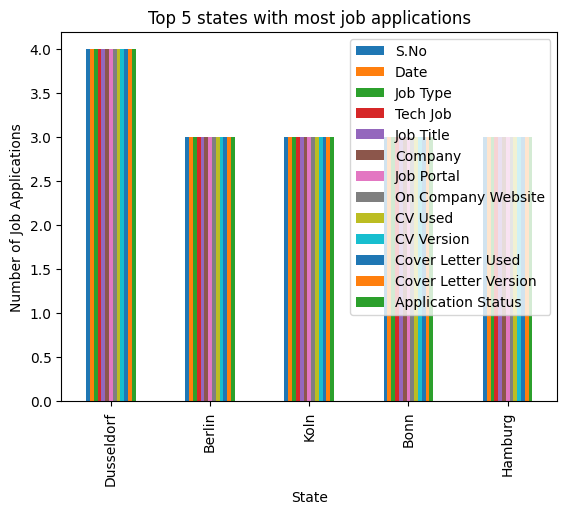

In [16]:
# figure size
plt.figure(figsize=(10, 10))
# visualize the top 5 states with most job applications
df.groupby('State').count().sort_values('Job Title', ascending=False).head(5).plot(kind='bar')
# set the title
plt.title('Top 5 states with most job applications')
# set the x-axis label
plt.xlabel('State')
# set the y-axis label
plt.ylabel('Number of Job Applications')
# show the plot
plt.show()

### 1.2 Most Popular Job Titles & Companies

In [17]:
# most popular job title and company
df.groupby(['Job Title','Company'])['Job Title'].count().sort_values(ascending=False).head(10)

Job Title                                     Company                                      
Accountant                                    Nordic Hamburg Shipmanagement GmbH & Co.KG       1
Intern Data Science & AI                      ProSiebenSat. 1 Careers                          1
Manager Transactions                          AviAlliance GmbH                                 1
Master Data Specialist                        Berner Omnichannel Trading Holding SE            1
Mathematiker / Data Analyst                   Verband der Privaten Krankenversicherung e.V.    1
Pricing and Business Intelligence Specialist  MOTUL Deutschland GmbH                           1
Senior Business Analyst                       Studydrive GmbH                                  1
Senior Consultant Data & Analytics            Adesso SE                                        1
Senior Data Analyst / Data Engineer           Deutsche Bank                                    1
Senior Data Analyst Tracking & Web 

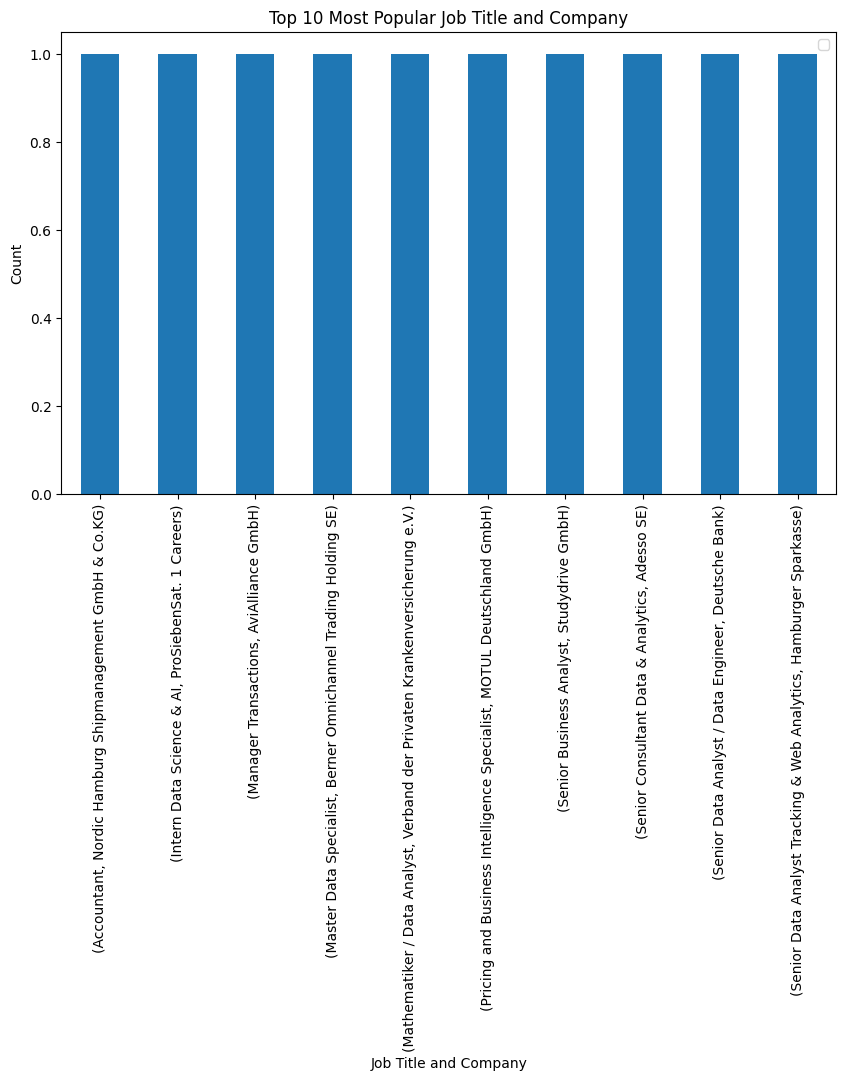

In [18]:
# figure size
plt.figure(figsize=(10,6))
# visualize the most popular job title and company
df.groupby(['Job Title','Company']).size().sort_values(ascending=False).head(10).plot(kind='bar')
# set the title and labels
plt.title('Top 10 Most Popular Job Title and Company')
# set the x and y labels
plt.xlabel('Job Title and Company')
plt.ylabel('Count')
# show the plot
plt.legend()
plt.show()

### 1.3 Top Companies With Most Jobs Openings

In [19]:
# Group by company and count job openings
company_job_count = df.groupby('Company').size().reset_index(name='Job Count')
# Sort the companies by job count in descending order
top_companies = company_job_count.sort_values(by='Job Count', ascending=False)
# Show top companies
print(top_companies.head(10))


                                       Company  Job Count
0                                     Gartner           1
19                         Kras-Logistics GmbH          1
21  Nordic Hamburg Shipmanagement GmbH & Co.KG          1
22                     ProSiebenSat. 1 Careers          1
23                          Quadra Energy GmbH          1
24                           Remmers Gruppe AG          1
25                                      SAP.SE          1
26                     SHD System-Haus-Dresden          1
27                                 SYNGENIO AG          1
28                                     Shopify          1


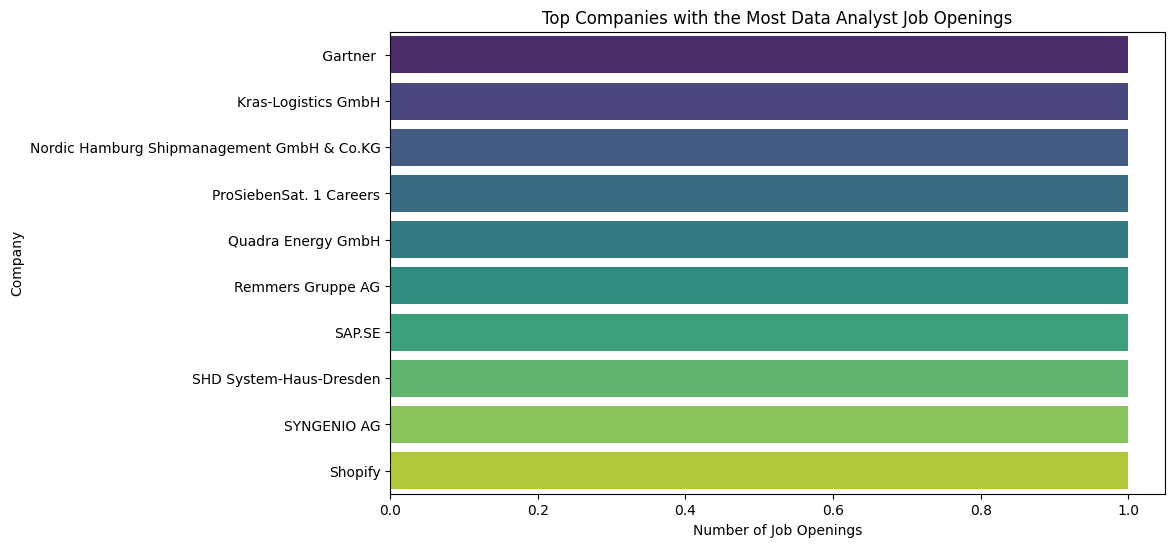

In [20]:
# figure size
plt.figure(figsize=(10,6))
# Plot the top companies with the most job openings
sns.barplot(x='Job Count', y='Company', data=top_companies.head(10), palette='viridis')
# Add labels and title
plt.title('Top Companies with the Most Data Analyst Job Openings')
plt.xlabel('Number of Job Openings')
plt.ylabel('Company')
# Show the plot
plt.show()

### 1.4 Most Effective Jobs Portals (EG: StepStone, Linkedin)

In [21]:
# Group by 'Job Portal' and count the number of applications for each portal
job_portal_counts = df['Job Portal'].value_counts().reset_index()
# Rename the columns for clarity
job_portal_counts.columns = ['Job Portal', 'Number of Applications']
# View the top portals
print(job_portal_counts.head(10))

  Job Portal  Number of Applications
0  StepStone                      29
1   LinkedIn                       8


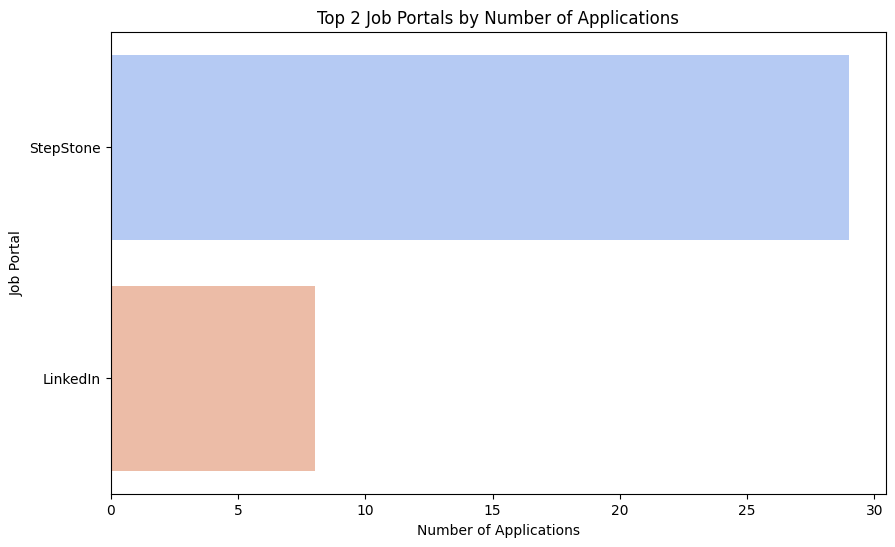

In [23]:
# figure size
plt.figure(figsize=(10,6))
# Plot the top 5 job portals by the number of applications
sns.barplot(x='Number of Applications', y='Job Portal', data=job_portal_counts.head(2), palette='coolwarm')
# Add labels and title
plt.title('Top 2 Job Portals by Number of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Job Portal')
# Show the plot
plt.show()

# 2. CV and Cover Letter Usage Statistics

In [25]:
# Group by CV and Cover Letter usage, and analyze their impact on Application Status
cv_status = df.groupby(['CV Used', 'Application Status']).size().unstack().fillna(0)
cover_letter_status = df.groupby(['Cover Letter Used', 'Application Status']).size().unstack().fillna(0)
print("CV Usage vs Application Status:\n", cv_status)
print("\nCover Letter Usage vs Application Status:\n", cover_letter_status)

CV Usage vs Application Status:
 Application Status  Accepted  Pending  Rejected
CV Used                                        
Yes                        1       25        11

Cover Letter Usage vs Application Status:
 Application Status  Accepted  Pending  Rejected
Cover Letter Used                              
No                       1.0     23.0       8.0
Yes                      0.0      2.0       3.0


In [26]:
df.columns

Index(['S.No', 'Date', 'State', 'Job Type', 'Tech Job', 'Job Title', 'Company',
       'Job Portal', 'On Company Website', 'CV Used', 'CV Version',
       'Cover Letter Used', 'Cover Letter Version', 'Application Status'],
      dtype='object')

In [29]:
# Plot CV usage
plt.figure(figsize=(8, 5))
sns.barplot(x=CV Used.index, y=CV Used.values, palette='coolwarm')
plt.title('CV Usage Percentage')
plt.ylabel('Percentage (%)')
plt.show()

# Plot Cover Letter usage
plt.figure(figsize=(8, 5))
sns.barplot(x=Cover Latter Used.index, y=Cover Latter Used.values, palette='coolwarm')
plt.title('Cover Letter Usage Percentage')
plt.ylabel('Percentage (%)')
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (797986257.py, line 3)

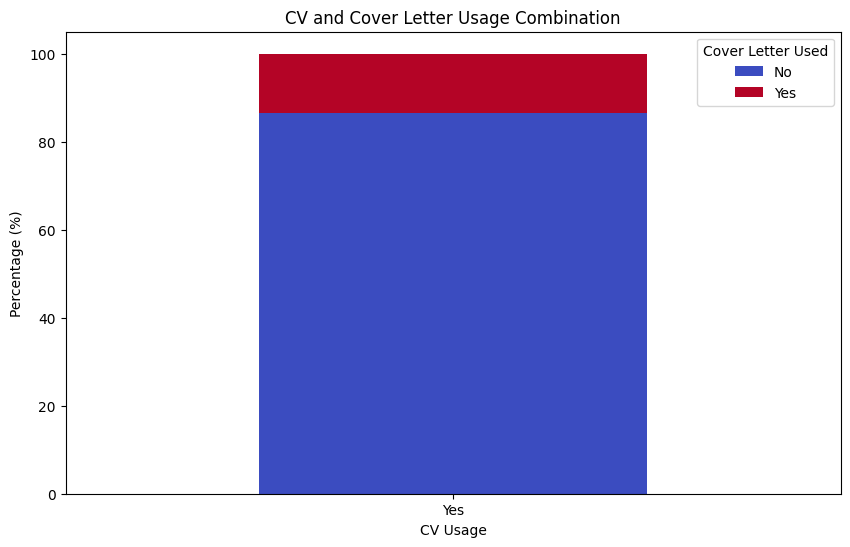

In [30]:
# Create cross-tabulation
cv_cover_letter_usage = pd.crosstab(df['CV Used'], df['Cover Letter Used'], normalize='index') * 100
# Plot the cross-tabulation of CV and Cover Letter usage
cv_cover_letter_usage.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title('CV and Cover Letter Usage Combination')
plt.ylabel('Percentage (%)')
plt.xlabel('CV Usage')
plt.xticks(rotation=0)
plt.show()

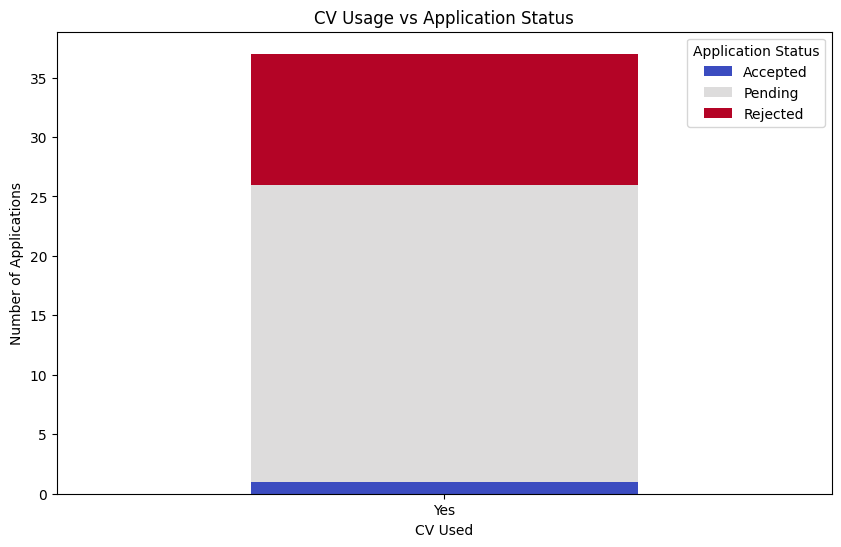

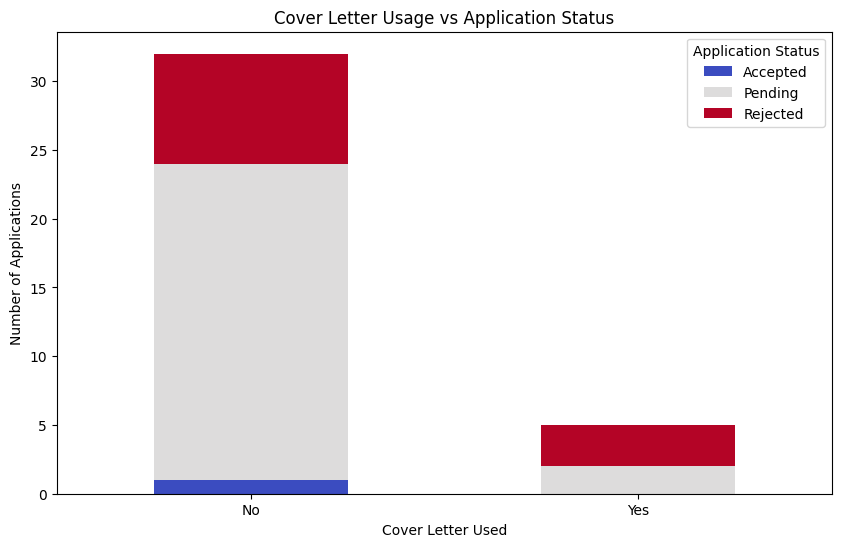

In [31]:
# Plot CV usage vs Application Status
cv_status.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title('CV Usage vs Application Status')
plt.ylabel('Number of Applications')
plt.xticks(rotation=0)
plt.show()

# Plot Cover Letter usage vs Application Status
cover_letter_status.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title('Cover Letter Usage vs Application Status')
plt.ylabel('Number of Applications')
plt.xticks(rotation=0)
plt.show()

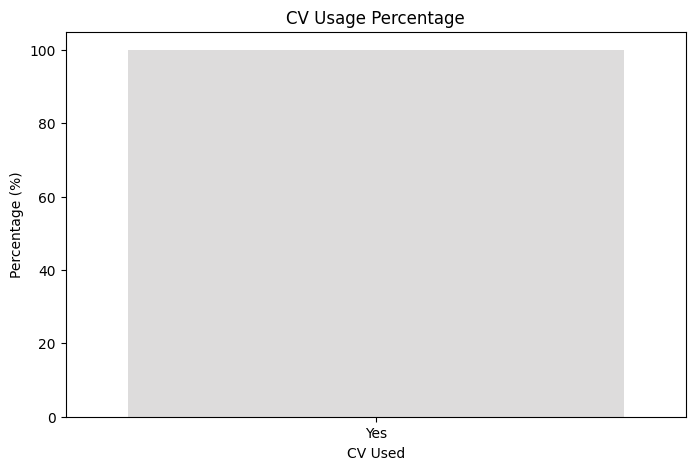

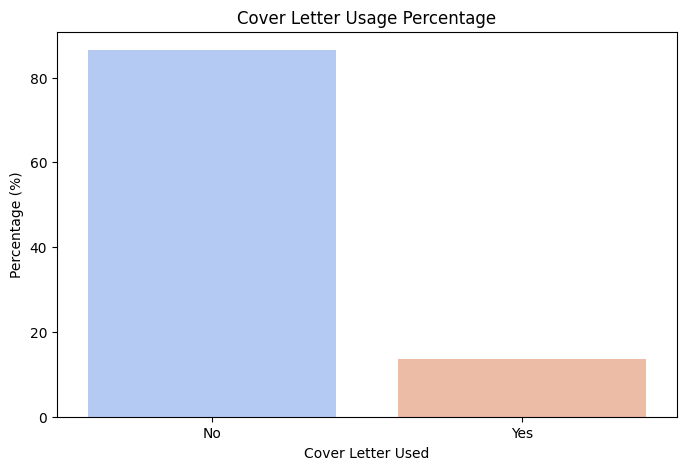

In [32]:
# Calculate the percentage of CV and Cover Letter usage
cv_usage = df['CV Used'].value_counts(normalize=True) * 100
cover_letter_usage = df['Cover Letter Used'].value_counts(normalize=True) * 100

# Plot CV usage
plt.figure(figsize=(8, 5))
sns.barplot(x=cv_usage.index, y=cv_usage.values, palette='coolwarm')
plt.title('CV Usage Percentage')
plt.ylabel('Percentage (%)')
plt.show()

# Plot Cover Letter usage
plt.figure(figsize=(8, 5))
sns.barplot(x=cover_letter_usage.index, y=cover_letter_usage.values, palette='coolwarm')
plt.title('Cover Letter Usage Percentage')
plt.ylabel('Percentage (%)')
plt.show()

In [34]:
# Calculate success rates for CV usage
success_rate_cv = df[df['Application Status'] == 'Accepted'].groupby('CV Used').size() / df.groupby('CV Used').size() * 100

# Calculate success rates for Cover Letter usage
success_rate_cover_letter = df[df['Application Status'] == 'Accepted'].groupby('Cover Letter Used').size() / df.groupby('Cover Letter Used').size() * 100

print("Success Rate based on CV usage:\n", success_rate_cv)
print("\nSuccess Rate based on Cover Letter usage:\n", success_rate_cover_letter)


Success Rate based on CV usage:
 CV Used
Yes    2.702703
dtype: float64

Success Rate based on Cover Letter usage:
 Cover Letter Used
No     3.125
Yes      NaN
dtype: float64


**Summary of Insights:**

CV and Cover Letter Usage: See how many applicants used a CV or cover letter.\
Combinations of CV and Cover Letter Usage: Find out how common it is for applicants to submit both or neither.\
Impact on Application Success: Determine whether using a CV or cover letter improves the chances of an application being accepted.\
This analysis can be used to guide job applicants on the importance of including a CV and cover letter in their applications.

# 3. Trend Analysis

**Steps to Perform Monthly Job Application Trend Analysis**\

Load and Clean the Dataset\
Convert Date Column to datetime\
Extract Month and Year\
Group by Month and Year


In [35]:
# Create new columns for Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
# Optionally, create a Month-Year column for more readable grouping
df['Month_Year'] = df['Date'].dt.to_period('M')


In [36]:
# Group by Month-Year and count the number of applications
monthly_trends = df.groupby('Month_Year').size().reset_index(name='Number_of_Applications')

# View the monthly trends
print(monthly_trends)


  Month_Year  Number_of_Applications
0    2024-08                      21
1    2024-09                      16


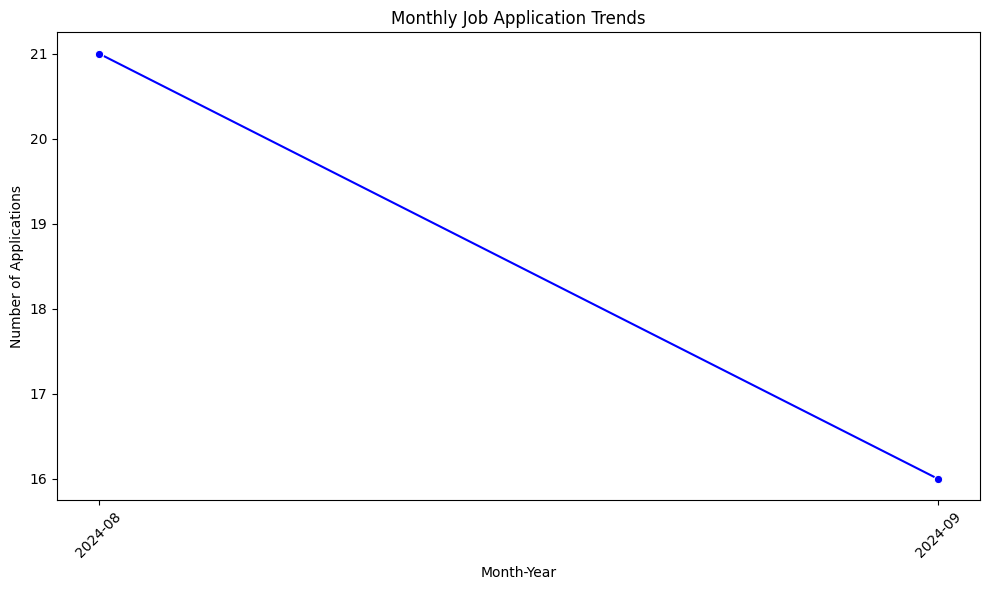

In [37]:
# Convert 'Month_Year' to string for plotting
monthly_trends['Month_Year'] = monthly_trends['Month_Year'].astype(str)

# Sort the data by 'Month_Year' for chronological plotting
monthly_trends = monthly_trends.sort_values('Month_Year')

# Plot the monthly job application trends
plt.figure(figsize=(10,6))
sns.lineplot(x='Month_Year', y='Number_of_Applications', data=monthly_trends, marker='o', color='b')
plt.title('Monthly Job Application Trends')
plt.xlabel('Month-Year')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


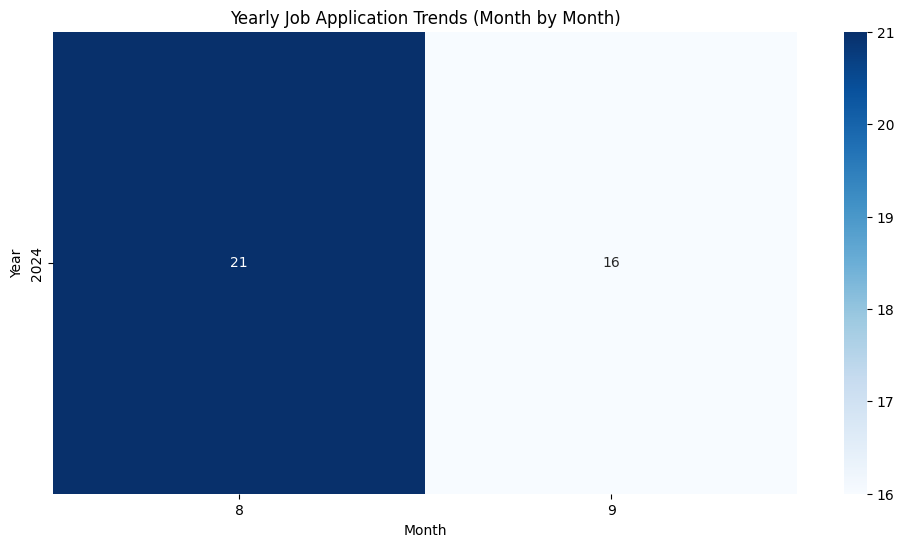

In [38]:
# Group by Year and Month for comparison across years
monthly_trends_yearly = df.groupby(['Year', 'Month']).size().unstack().fillna(0)
# Plot a heatmap to show trends over the years
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_trends_yearly, cmap="Blues", annot=True, fmt='.0f')
plt.title('Yearly Job Application Trends (Month by Month)')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()


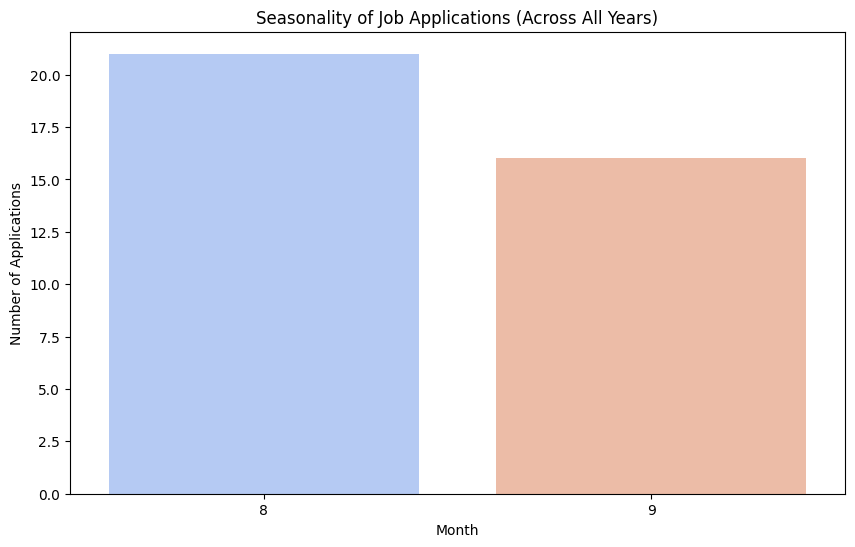

In [39]:
# Group by Month only to analyze seasonality (ignoring the year)
monthly_seasonality = df.groupby('Month').size().reset_index(name='Number_of_Applications')
# Plot the seasonality trends
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='Number_of_Applications', data=monthly_seasonality, palette='coolwarm')
plt.title('Seasonality of Job Applications (Across All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.show()

**Summary of the Process**:

Extract and Clean Date Information: Convert the Application_Date column into datetime format and extract month and year.\
Group Data: Group the data by month and year to count the number of applications.\
Visualize: Use line charts, bar plots, and heatmaps to visualize the monthly trends and seasonality.\
Optional Insights: You can further analyze yearly trends, seasonal variations, and other patterns to draw more detailed conclusions.\
This approach will help you understand how job applications fluctuate month-to-month, spot seasonal trends, and observe long-term changes.

# 4. Correlation Analysis

# 4.1 Relation Between Job Titles & Company

In [40]:
# Group by Company and Job Title and count occurrences
job_title_company_counts = df.groupby(['Company', 'Job Title']).size().reset_index(name='Count')
# Sort the data by count for better readability
job_title_company_counts = job_title_company_counts.sort_values(by='Count', ascending=False)
# View the results
print(job_title_company_counts.head(10))

                                       Company  \
0                                     Gartner    
19                         Kras-Logistics GmbH   
21  Nordic Hamburg Shipmanagement GmbH & Co.KG   
22                     ProSiebenSat. 1 Careers   
23                          Quadra Energy GmbH   
24                           Remmers Gruppe AG   
25                                      SAP.SE   
26                     SHD System-Haus-Dresden   
27                                 SYNGENIO AG   
28                                     Shopify   

                                     Job Title  Count  
0   Senior Director Analyst, AI Data Analytics      1  
19       Airfreight & Ocean Freight Specialist      1  
21                                  Accountant      1  
22                    Intern Data Science & AI      1  
23                          IT System Engineer      1  
24                       Junior Data Scientist      1  
25                     IT technology Services       1  
2

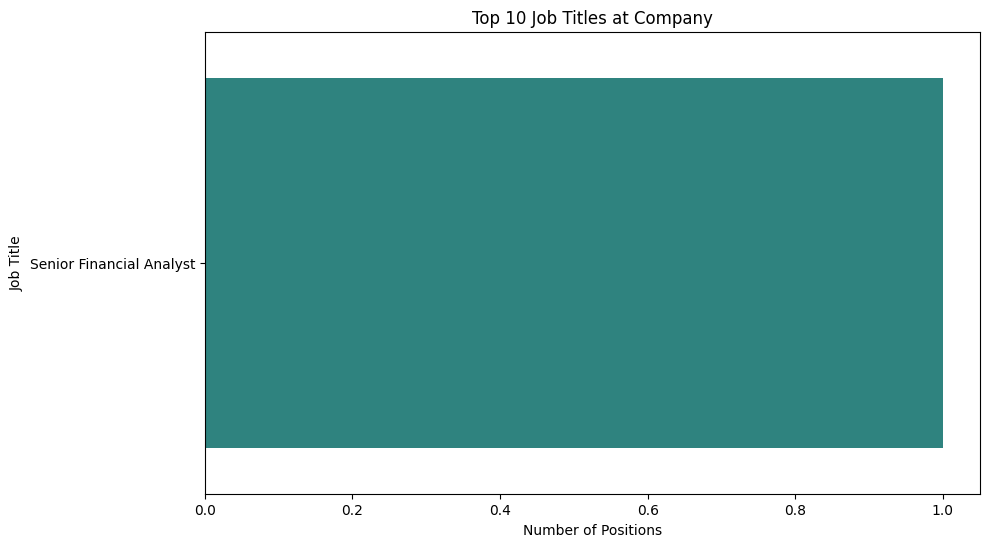

In [41]:
# Filter for a specific company 
company_data = job_title_company_counts[job_title_company_counts['Company'] == 'Shopify']
# Plot the top 10 job titles for Company
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Job Title', data=company_data.head(10), palette='viridis')
plt.title('Top 10 Job Titles at Company')
plt.xlabel('Number of Positions')
plt.ylabel('Job Title')
plt.show()

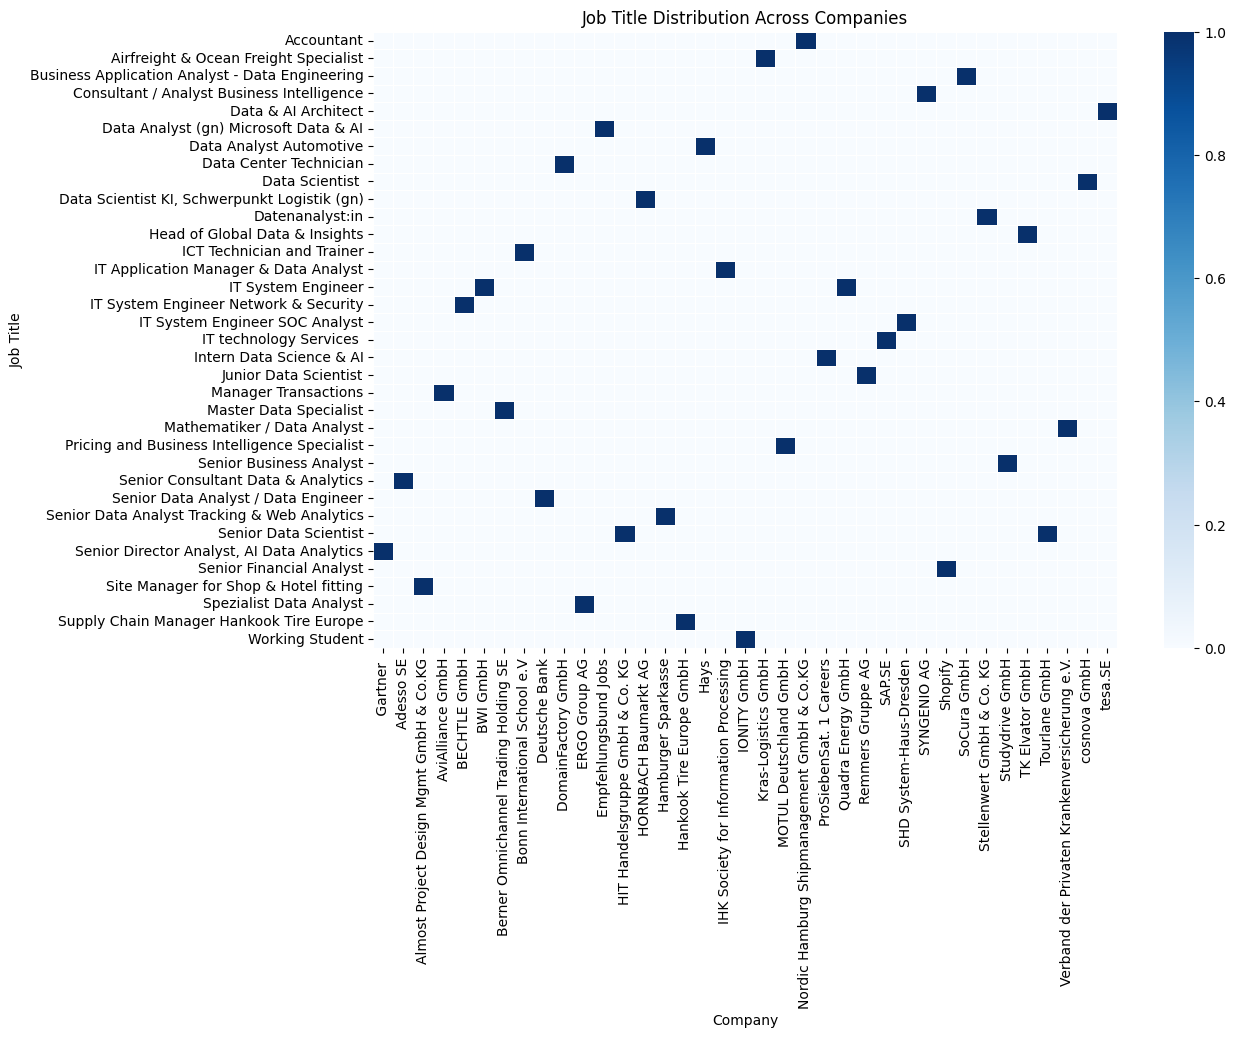

In [42]:
# Create a pivot table to analyze the relationship between Job_Title and Company
pivot_table = job_title_company_counts.pivot(index='Job Title', columns='Company', values='Count').fillna(0)
# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='Blues', linewidths=0.5)
plt.title('Job Title Distribution Across Companies')
plt.xlabel('Company')
plt.ylabel('Job Title')
plt.show()

# 4.2 Exploring The Most Common Job Titles Per Company

In [43]:
# Get the most common job title per company
most_common_job_title_per_company = job_title_company_counts.loc[
    job_title_company_counts.groupby('Company')['Count'].idxmax()
]

# View the results
print(most_common_job_title_per_company)


                                          Company  \
0                                        Gartner    
1                                       Adesso SE   
2         Almost Project Design Mgmt GmbH & Co.KG   
3                                AviAlliance GmbH   
4                                    BECHTLE GmbH   
5                                        BWI GmbH   
6           Berner Omnichannel Trading Holding SE   
7                   Bonn International School e.V   
8                                   Deutsche Bank   
9                              DomainFactory GmbH   
10                                  ERGO Group AG   
11                           Empfehlungsbund Jobs   
12                HIT Handelsgruppe GmbH & Co. KG   
13                           HORNBACH Baumarkt AG   
14                            Hamburger Sparkasse   
15                       Hankook Tire Europe GmbH   
16                                           Hays   
17         IHK Society for Information Process

# 4.3 Exploring The Most Common Job Titles Per Company

In [44]:
# Create a pivot table for the relationship between Job Title and Company
pivot_table = pd.pivot_table(df, index='Company', columns='Job Title', aggfunc='size', fill_value=0)

# View the pivot table
print(pivot_table.head())

Job Title                                Accountant  \
Company                                               
 Gartner                                          0   
Adesso SE                                         0   
Almost Project Design Mgmt GmbH & Co.KG           0   
AviAlliance GmbH                                  0   
BECHTLE GmbH                                      0   

Job Title                                Airfreight & Ocean Freight Specialist  \
Company                                                                          
 Gartner                                                                     0   
Adesso SE                                                                    0   
Almost Project Design Mgmt GmbH & Co.KG                                      0   
AviAlliance GmbH                                                             0   
BECHTLE GmbH                                                                 0   

Job Title                              

**Conclusion:**

Job Title Frequency: You can see which companies are offering which job titles the most frequently.\
Visualization: Bar plots and heatmaps help visualize the distribution of job titles across companies, highlighting which companies focus on certain roles.\
Most Common Job Titles: By analyzing the most common job titles for each company, you can identify what types of roles companies are hiring for the most.\
These insights help uncover the relationship between companies and the job roles they offer, which can be used to analyze industry trends, focus areas of companies, and more.

# 5. Segmentation Analysis

# 5.1 Job application distribution by state 

#### To analyze the job application distribution by state using Python, follow these steps to explore how job applications are distributed across various states. This analysis can help understand which states have the most job applications.

In [45]:
# Group by State and count the number of applications
state_distribution = df.groupby('State').size().reset_index(name='Number_of_Applications')
# Sort the data by the number of applications for better readability
state_distribution = state_distribution.sort_values(by='Number_of_Applications', ascending=False)
# View the results
print(state_distribution.head())

         State  Number_of_Applications
8   Dusseldorf                       4
0       Berlin                       3
14        Koln                       3
2         Bonn                       3
10     Hamburg                       3


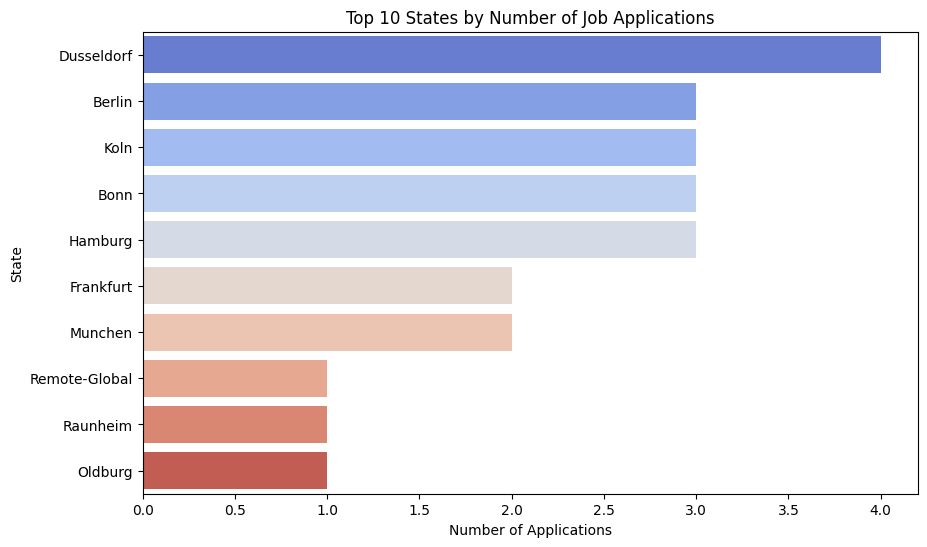

In [46]:
# figure size
plt.figure(figsize=(10,6))
# Plot the top 10 states with the most job applications
sns.barplot(x='Number_of_Applications', y='State', data=state_distribution.head(10), palette='coolwarm')
# Add labels and title
plt.title('Top 10 States by Number of Job Applications')
plt.xlabel('Number of Applications')
plt.ylabel('State')
plt.show()

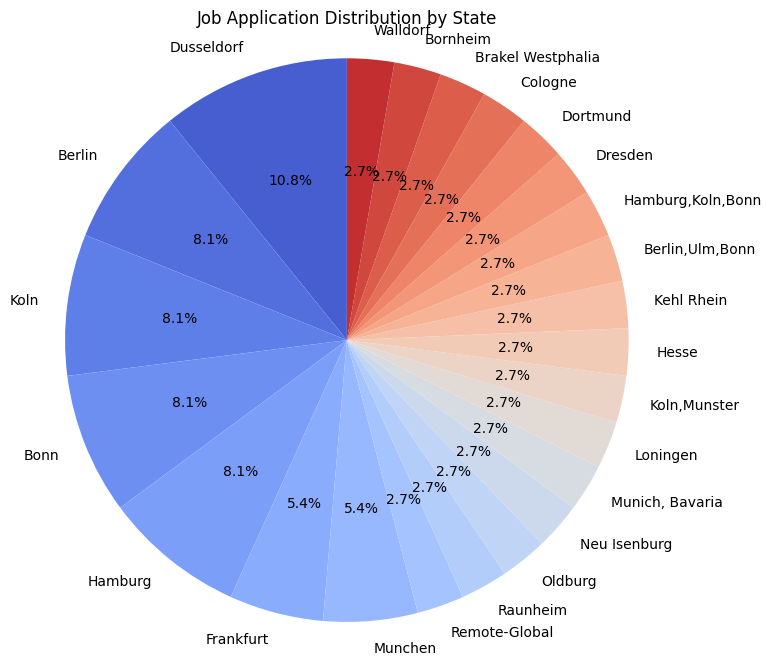

In [47]:
# Figure size
plt.figure(figsize=(8,8))
# Plot a pie chart to show the distribution of job applications by state
plt.pie(state_distribution['Number_of_Applications'], labels=state_distribution['State'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', n_colors=len(state_distribution)))
# Add labels and title
plt.title('Job Application Distribution by State')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Conclusion:**

State Distribution: The dataset is grouped by State and the number of job applications in each state is counted.\
Visualization: Bar plots and pie charts can visually display which states receive the most job applications.\
This analysis provides insights into the states where job applications are concentrated and could help in understanding regional hiring trends.

# 5.2 Industry-wise job application analysis

### To perform an industry-wise job application analysis using Python, you can analyze how job applications are distributed across various industries. This analysis helps in identifying industries that are receiving the most applications and understanding trends within each industry.

In [48]:
# Group by Company and count the number of applications
Company_distribution = df.groupby('Company').size().reset_index(name='Number_of_Applications')

# Sort the data by the number of applications for better readability
Company_distribution = Company_distribution.sort_values(by='Number_of_Applications', ascending=False)

# View the results
print(Company_distribution.head())


                                       Company  Number_of_Applications
0                                     Gartner                        1
19                         Kras-Logistics GmbH                       1
21  Nordic Hamburg Shipmanagement GmbH & Co.KG                       1
22                     ProSiebenSat. 1 Careers                       1
23                          Quadra Energy GmbH                       1


In [49]:
# Example of defining the company_distribution DataFrame
company_distribution = df.groupby('Company')['S.No'].sum().reset_index().sort_values(by='S.No', ascending=False)

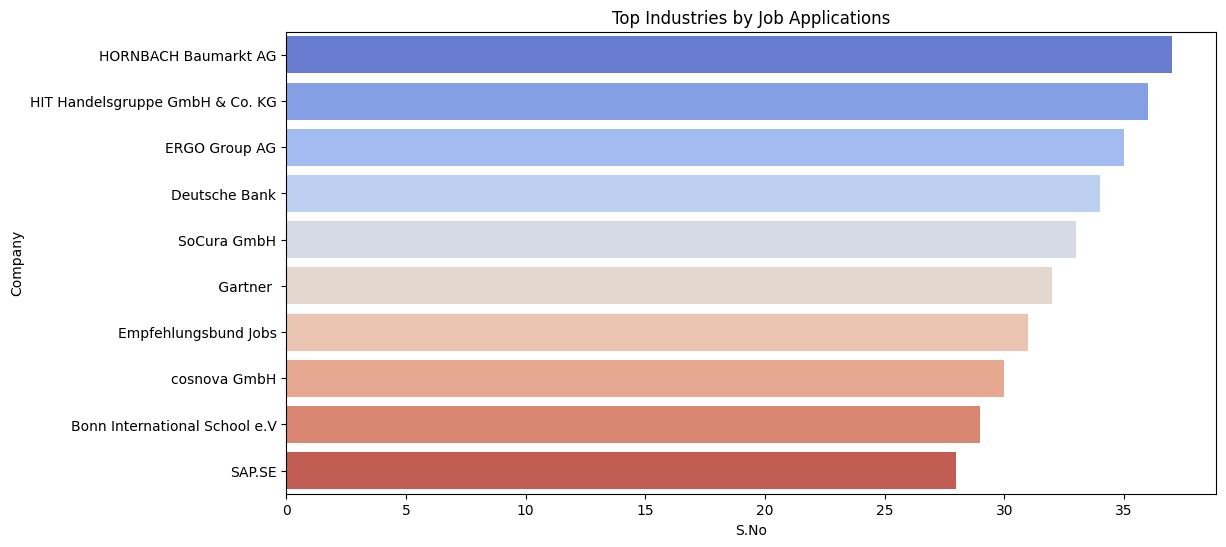

In [50]:
# Figure size
plt.figure(figsize=(12,6))
# Plot the top industries by job applications
sns.barplot(x='S.No', y='Company', data=company_distribution.head(10), palette='coolwarm')
plt.title('Top Industries by Job Applications')
plt.xlabel('S.No')
plt.ylabel('Company')
plt.show()

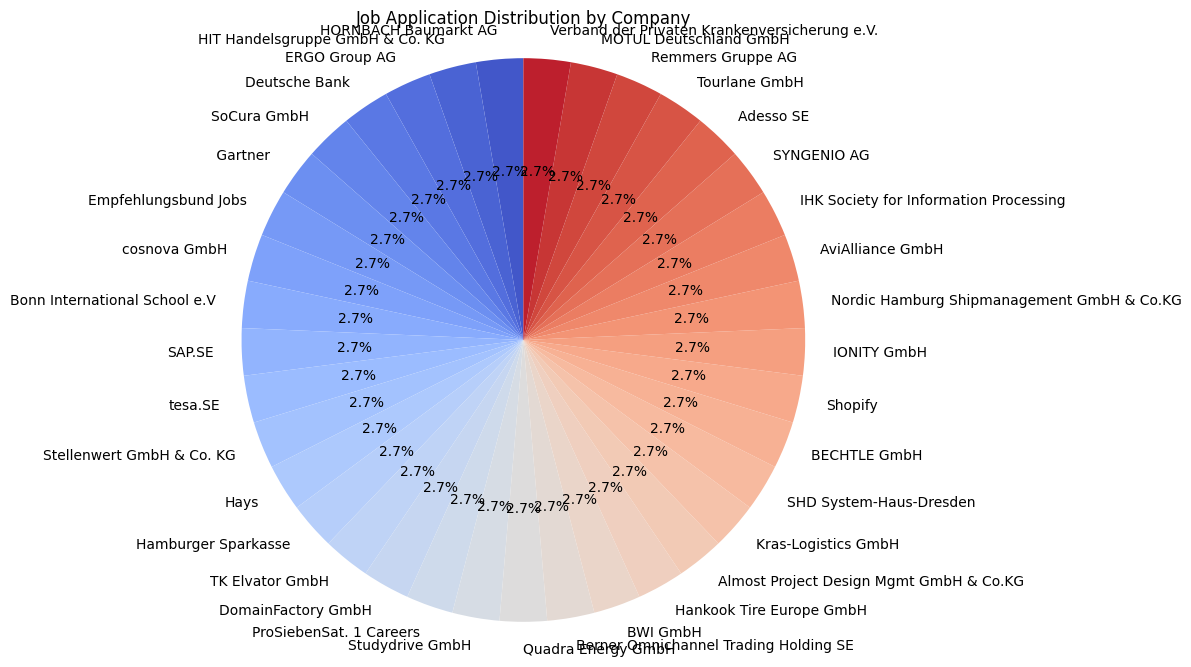

In [51]:
# Figure size
plt.figure(figsize=(8,8))
# Plot a pie chart for industry-wise distribution
plt.pie(Company_distribution['Number_of_Applications'], labels=company_distribution['Company'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', n_colors=len(company_distribution)))
plt.title('Job Application Distribution by Company')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [52]:
# Assuming 'company_distribution' is a DataFrame or Series containing industry distribution
top_5_industries = company_distribution.head(5)

# Display the top 5 industries
print(top_5_industries)

                            Company  S.No
13             HORNBACH Baumarkt AG    37
12  HIT Handelsgruppe GmbH & Co. KG    36
10                    ERGO Group AG    35
8                     Deutsche Bank    34
29                      SoCura GmbH    33


In [54]:
# Filter for a specific industry (e.g., Technology)
tech_company_jobs = df[df['Tech Job'] == 'Technology']

# Group by Job Title within the Technology industry
tech_job_title_distribution = tech_company_jobs.groupby('Job Title').size().reset_index(name='Number_of_Applications')

# Sort and view the most common job titles in Technology
tech_job_title_distribution = tech_job_title_distribution.sort_values(by='Number_of_Applications', ascending=False)
print(tech_job_title_distribution.head())

                             Job Title  Number_of_Applications
14                  IT System Engineer                       2
28               Senior Data Scientist                       2
0                           Accountant                       1
25  Senior Consultant Data & Analytics                       1
20                Manager Transactions                       1


**Conclusion:**\
Industry Distribution: You can see how job applications are distributed across different industries and identify the most popular industries for job applications.\
Visualization: Bar plots and pie charts can help in visually understanding which industries are receiving the most job applications.\
Further Analysis: By diving deeper into specific industries, you can analyze the common job titles or trends within an industry.\
This analysis provides insights into job application trends across different sectors, helping to identify high-demand industries.

# 6. Predictive Insights

To predict job application success based on the usage of CVs and cover letters using Python, you can use machine learning techniques. The general workflow includes data preprocessing, feature engineering, model building, and model evaluation.\

Workflow for Predicting Job Application Success:\
Load and Explore the Dataset\
Feature Engineering\
Create features for CV and cover letter usage.\
Other relevant features (e.g., job title, industry, experience, etc.).\
Preprocessing the Data\
Split Data into Training and Testing Sets\
Train a Machine Learning Model\
Evaluate the Model Performance\

### 6.1 Predict Job Application Success Based On The Usage of CVs & Cover Letters

In [55]:
# Example feature engineering: Convert categorical columns like 'Job_Title' and 'Industry' to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Job Title', 'Company'], drop_first=True)

# Check the new columns
print(df.columns)


Index(['S.No', 'Date', 'State', 'Job Type', 'Tech Job', 'Job Portal',
       'On Company Website', 'CV Used', 'CV Version', 'Cover Letter Used',
       'Cover Letter Version', 'Application Status', 'Year', 'Month',
       'Month_Year', 'Job Title_Airfreight & Ocean Freight Specialist',
       'Job Title_Business Application Analyst - Data Engineering',
       'Job Title_Consultant / Analyst Business Intelligence',
       'Job Title_Data & AI Architect',
       'Job Title_Data Analyst (gn) Microsoft Data & AI',
       'Job Title_Data Analyst Automotive', 'Job Title_Data Center Technician',
       'Job Title_Data Scientist ',
       'Job Title_Data Scientist KI, Schwerpunkt Logistik (gn)',
       'Job Title_Datenanalyst:in', 'Job Title_Head of Global Data & Insights',
       'Job Title_ICT Technician and Trainer',
       'Job Title_IT Application Manager & Data Analyst',
       'Job Title_IT System Engineer',
       'Job Title_IT System Engineer Network & Security',
       'Job Title_IT 

In [70]:
from sklearn.preprocessing import LabelEncoder

# Encode the categorical variables using a for loop where object and category datatypes are given
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])

df.head()

,S.No,Date,Job Type,Tech Job,On Company Website,CV Used,CV Version,Cover Letter Used,Cover Letter Version,Application Status,...,Company_SYNGENIO AG,Company_Shopify,Company_SoCura GmbH,Company_Stellenwert GmbH & Co. KG,Company_Studydrive GmbH,Company_TK Elvator GmbH,Company_Tourlane GmbH,Company_Verband der Privaten Krankenversicherung e.V.,Company_cosnova GmbH,Company_tesa.SE
0,1,2024-08-15,0,0,1,0,0,1,1,0,...,False,False,False,False,False,False,False,True,False,False
1,2,2024-08-15,0,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,3,2024-08-15,0,0,1,0,0,1,2,0,...,False,False,False,False,False,False,False,False,False,False
3,4,2024-08-16,0,0,1,0,0,1,3,0,...,False,False,False,False,False,False,True,False,False,False
4,5,2024-08-16,0,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [57]:
df.columns

Index(['S.No', 'Date', 'State', 'Job Type', 'Tech Job', 'Job Portal',
       'On Company Website', 'CV Used', 'CV Version', 'Cover Letter Used',
       'Cover Letter Version', 'Application Status', 'Year', 'Month',
       'Month_Year', 'Job Title_Airfreight & Ocean Freight Specialist',
       'Job Title_Business Application Analyst - Data Engineering',
       'Job Title_Consultant / Analyst Business Intelligence',
       'Job Title_Data & AI Architect',
       'Job Title_Data Analyst (gn) Microsoft Data & AI',
       'Job Title_Data Analyst Automotive', 'Job Title_Data Center Technician',
       'Job Title_Data Scientist ',
       'Job Title_Data Scientist KI, Schwerpunkt Logistik (gn)',
       'Job Title_Datenanalyst:in', 'Job Title_Head of Global Data & Insights',
       'Job Title_ICT Technician and Trainer',
       'Job Title_IT Application Manager & Data Analyst',
       'Job Title_IT System Engineer',
       'Job Title_IT System Engineer Network & Security',
       'Job Title_IT 

In [58]:
df.columns

Index(['S.No', 'Date', 'State', 'Job Type', 'Tech Job', 'Job Portal',
       'On Company Website', 'CV Used', 'CV Version', 'Cover Letter Used',
       'Cover Letter Version', 'Application Status', 'Year', 'Month',
       'Month_Year', 'Job Title_Airfreight & Ocean Freight Specialist',
       'Job Title_Business Application Analyst - Data Engineering',
       'Job Title_Consultant / Analyst Business Intelligence',
       'Job Title_Data & AI Architect',
       'Job Title_Data Analyst (gn) Microsoft Data & AI',
       'Job Title_Data Analyst Automotive', 'Job Title_Data Center Technician',
       'Job Title_Data Scientist ',
       'Job Title_Data Scientist KI, Schwerpunkt Logistik (gn)',
       'Job Title_Datenanalyst:in', 'Job Title_Head of Global Data & Insights',
       'Job Title_ICT Technician and Trainer',
       'Job Title_IT Application Manager & Data Analyst',
       'Job Title_IT System Engineer',
       'Job Title_IT System Engineer Network & Security',
       'Job Title_IT 

In [60]:
# Separate the features and target variable
X = df.drop(['Application Status'], axis=1)
y = df['Application Status']

In [61]:
from sklearn.preprocessing import StandardScaler
# Drop non-numeric columns (e.g., 'Timestamp') if necessary
X_numeric = X.select_dtypes(include=[float, int])  # Keep only numeric columns

# Optional: If you want to handle datetime columns, convert them to numerical format (e.g., Unix timestamp)
# X['Timestamp'] = X['Timestamp'].apply(lambda x: x.timestamp())

# Scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# If you need to combine back with non-numeric columns, you can do so after scaling (if required)
# X_scaled_full = pd.concat([X_scaled_df, X_non_numeric], axis=1)


In [62]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing data
print(X_train.shape, X_test.shape)


(29, 12) (8, 12)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.62
              precision    recall  f1-score   support

           1       0.67      0.80      0.73         5
           2       0.50      0.33      0.40         3

    accuracy                           0.62         8
   macro avg       0.58      0.57      0.56         8
weighted avg       0.60      0.62      0.60         8

[[4 1]
 [2 1]]


In [64]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.80      0.80      0.80         5
           2       0.50      0.33      0.40         3

    accuracy                           0.62         8
   macro avg       0.43      0.38      0.40         8
weighted avg       0.69      0.62      0.65         8

[[0 0 0]
 [0 4 1]
 [1 1 1]]


**Conclusion:**

Feature Impact: Analyze the coefficients (for Logistic Regression) or feature importance (for Random Forest) to understand the importance of CV and cover letter usage.\
Model Performance: The accuracy and classification report give you an idea of how well your model is predicting success based on the provided features.\
Tuning: You can experiment with other models, perform hyperparameter tuning, or use cross-validation to improve the model's performance.\
This approach will help you predict job application success based on the usage of CVs and cover letters, along with other features in your dataset.

#  Identify Top Perform Job Portals For Specific Titles

### To identify the top-performing job portals for specific job titles using Python and machine learning, you can follow a structured workflow that combines data analysis and modeling techniques. The goal is to predict which job portal is most effective for specific job titles by analyzing historical job application data.

**Workflow:**\
Load and Explore the Dataset\
Feature Engineering\
Encode job titles and job portals.\
Add relevant features (like job industry, experience, etc.).\
Preprocess the Data\
Build a Machine Learning Model\
Use classification models to predict the most effective job portal for a specific job title.\
Evaluate the Model Performance\
Analyze Results and Identify Top-Performing Portals

### 6.2 To Identify The Top-Performing Job Portals For Specific Job Titles

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
#df = pd.read_excel('job.xlsx')

# Display first few rows
df.head()

# Convert 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful features from the date, such as 'month' and 'year'
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Convert categorical columns like 'job portals', 'job title' to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Job Title', 'Job Portal', 'State', 'Company'], drop_first=True)

# Convert 'application status' to binary (0 for failure, 1 for success)
df['Application Status'] = df['Application Status'].apply(lambda x: 1 if x == 'success' else 0)

# Display updated dataframe
df.head()



,S.No,Date,Job Type,Tech Job,On Company Website,CV Used,CV Version,Cover Letter Used,Cover Letter Version,Application Status,...,Company_SYNGENIO AG,Company_Shopify,Company_SoCura GmbH,Company_Stellenwert GmbH & Co. KG,Company_Studydrive GmbH,Company_TK Elvator GmbH,Company_Tourlane GmbH,Company_Verband der Privaten Krankenversicherung e.V.,Company_cosnova GmbH,Company_tesa.SE
0,1,2024-08-15,Full Time,Technology,Yes,Yes,Shahid CV 1,Yes,Shahid Cover Latter 1,0,...,False,False,False,False,False,False,False,True,False,False
1,2,2024-08-15,Full Time,Technology,Yes,Yes,Shahid CV 1,No,Not Required,0,...,False,False,False,False,False,False,False,False,False,False
2,3,2024-08-15,Full Time,Technology,Yes,Yes,Shahid CV 1,Yes,Shahid Cover Latter 2,0,...,False,False,False,False,False,False,False,False,False,False
3,4,2024-08-16,Full Time,Technology,Yes,Yes,Shahid CV 1,Yes,Shahid Cover Latter 3,0,...,False,False,False,False,False,False,True,False,False,False
4,5,2024-08-16,Full Time,Technology,Yes,Yes,Shahid CV 1,No,Not Required,0,...,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='Job Portal', ylabel='count'>

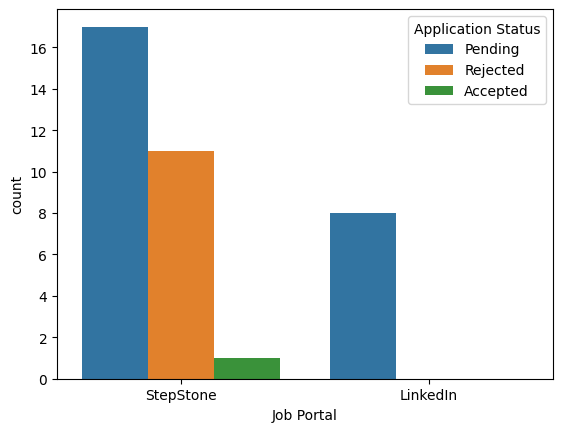

In [79]:
sns.countplot(x='Job Portal', hue='Application Status', data=df)

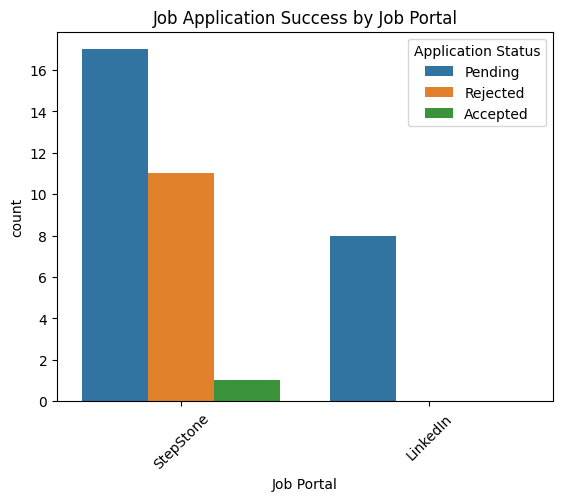

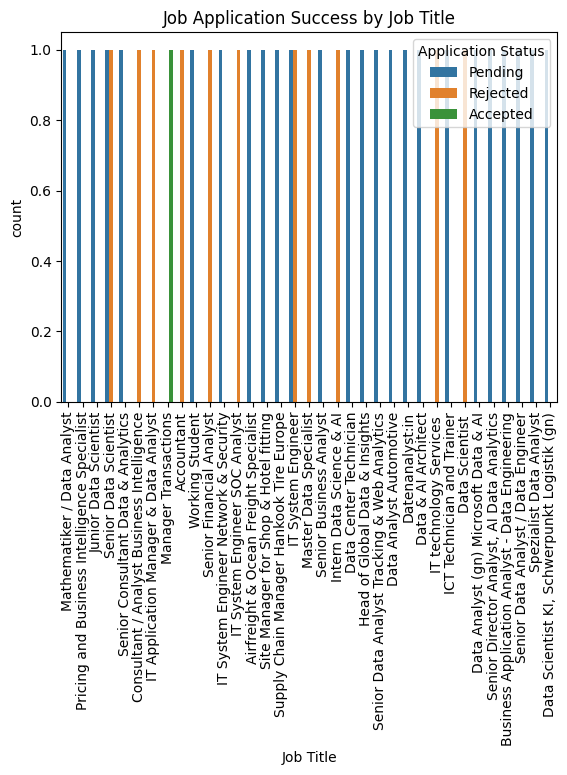

In [80]:
# Plot the number of successful applications by job portal
sns.countplot(x='Job Portal', hue='Application Status', data=df)
plt.title('Job Application Success by Job Portal')
plt.xticks(rotation=45)
plt.show()

# Plot the number of successful applications by job title
sns.countplot(x='Job Title', hue='Application Status', data=df)
plt.title('Job Application Success by Job Title')
plt.xticks(rotation=90)
plt.show()

**Conclusion:**

Top Performing Job Portals: Once you have predictions, you can analyze which portals are most likely to result in a successful job application for specific job titles.\
Feature Analysis: Use feature importance to identify the most influential factors in determining the best job portals.\
Model Selection: Random Forest or Decision Trees are good models for understanding feature importance, while Logistic Regression provides a simpler, interpretable model.\
This approach helps you build a model that can predict the best job portal for specific job titles based on past job application success.

# 7. Visualization

### 7.1 Bar plot for top states/companies/job titles

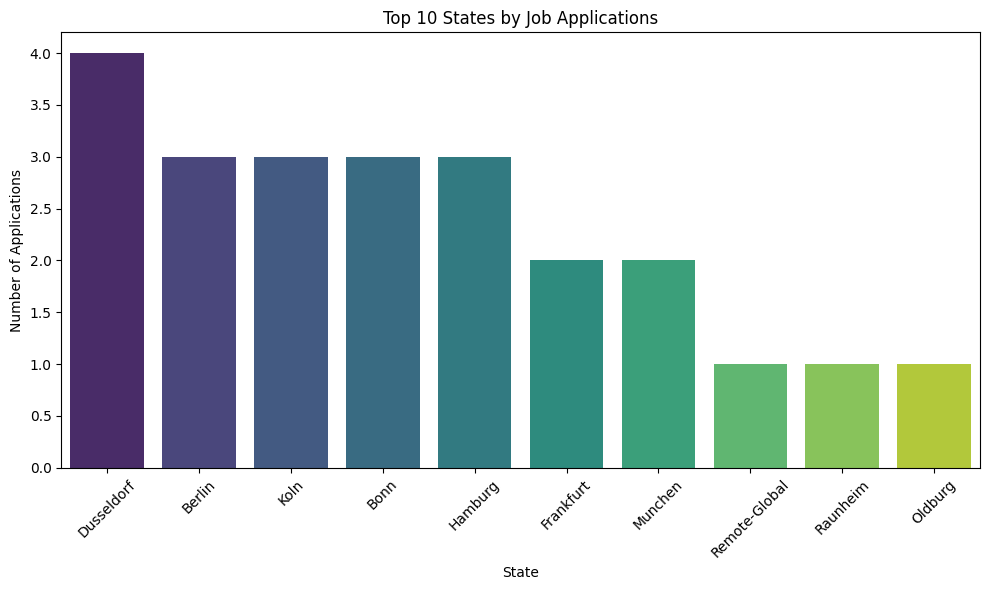

In [81]:
# Group by 'State' and count the number of applications per state
top_states = df.groupby('State')['S.No'].count().reset_index().sort_values(by='S.No', ascending=False)

# Select top 10 states
top_states = top_states.head(10)

# Plot the top 10 states
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='S.No', data=top_states, palette='viridis')
plt.title('Top 10 States by Job Applications')
plt.xlabel('State')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7.2 heatmaps for job application distribution by state/company 

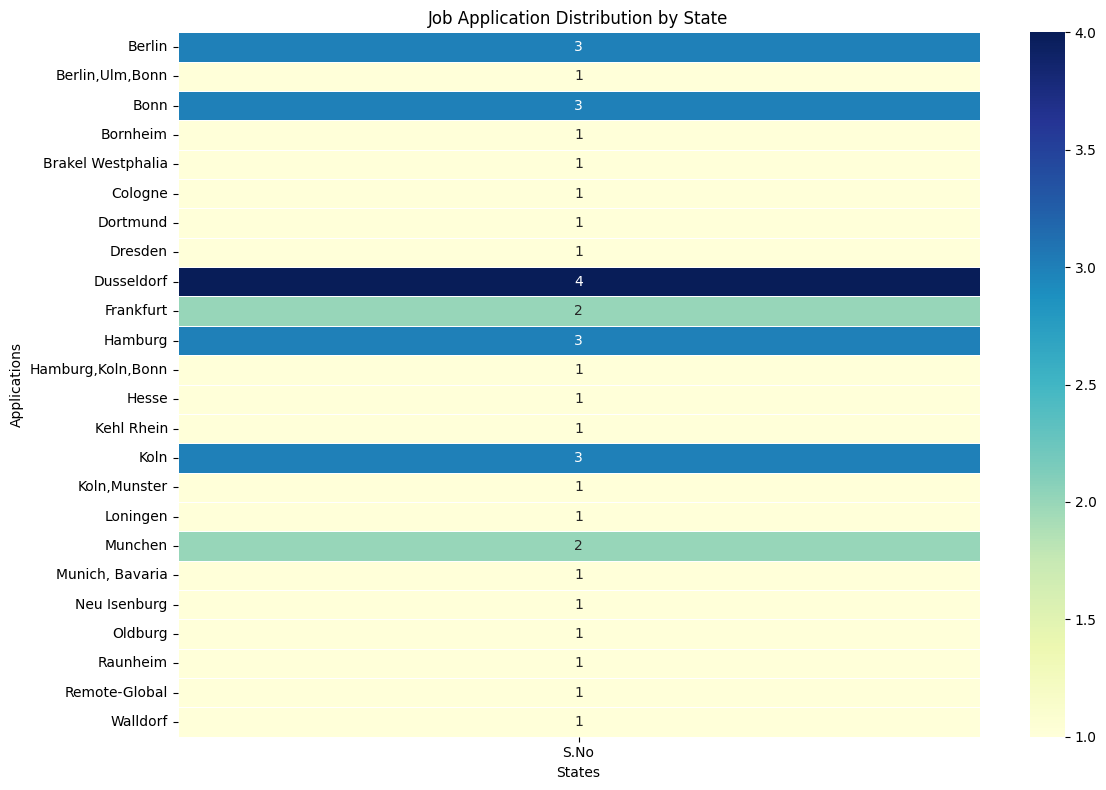

In [82]:
# Group by 'State' and aggregate the number of applications per state
state_applications = df.groupby('State')['S.No'].count().reset_index()

# If you have multiple factors influencing the distribution (e.g., job titles, companies)
# you might want to pivot the table. In this example, we'll just show counts by state.
# You can skip pivoting if you're directly using counts.

# Create a heatmap-ready pivot table if needed (example: for companies across states)
# pivot_table = df.pivot_table(values='Application_ID', index='State', columns='Company', aggfunc='count')

# Plotting heatmap for application counts by state
plt.figure(figsize=(12, 8))
state_data = state_applications.pivot_table(values='S.No', index='State', aggfunc='sum')

# Generate heatmap
sns.heatmap(state_data, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Job Application Distribution by State')
plt.xlabel('States')
plt.ylabel('Applications')
plt.tight_layout()
plt.show()

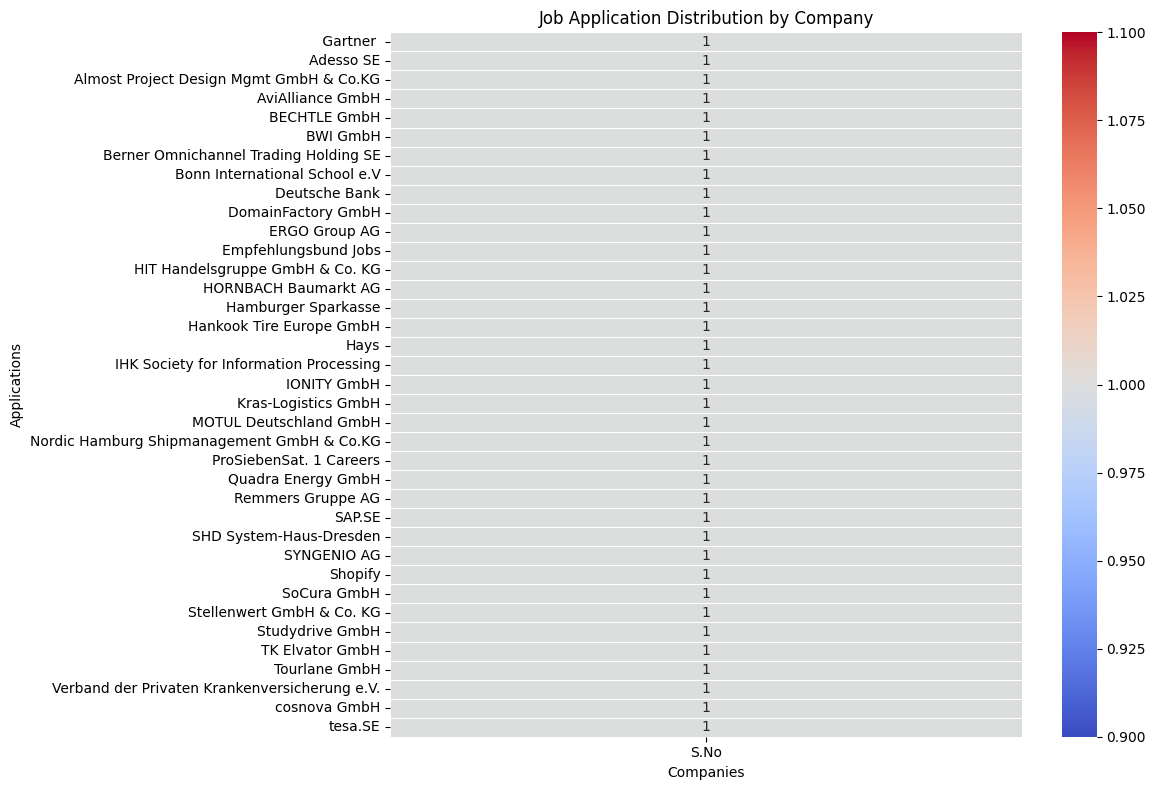

In [91]:
# Group by 'Company' and aggregate the number of applications per company
company_applications = df.groupby('Company')['S.No'].count().reset_index()

# Pivot table if you want to analyze distribution across states as well
# In this case, we'll just aggregate by company

# Plotting heatmap for job applications by company
plt.figure(figsize=(12, 8))
company_data = company_applications.pivot_table(values='S.No', index='Company', aggfunc='sum')

# Generate heatmap
sns.heatmap(company_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Job Application Distribution by Company')
plt.xlabel('Companies')
plt.ylabel('Applications')
plt.tight_layout()
plt.show()

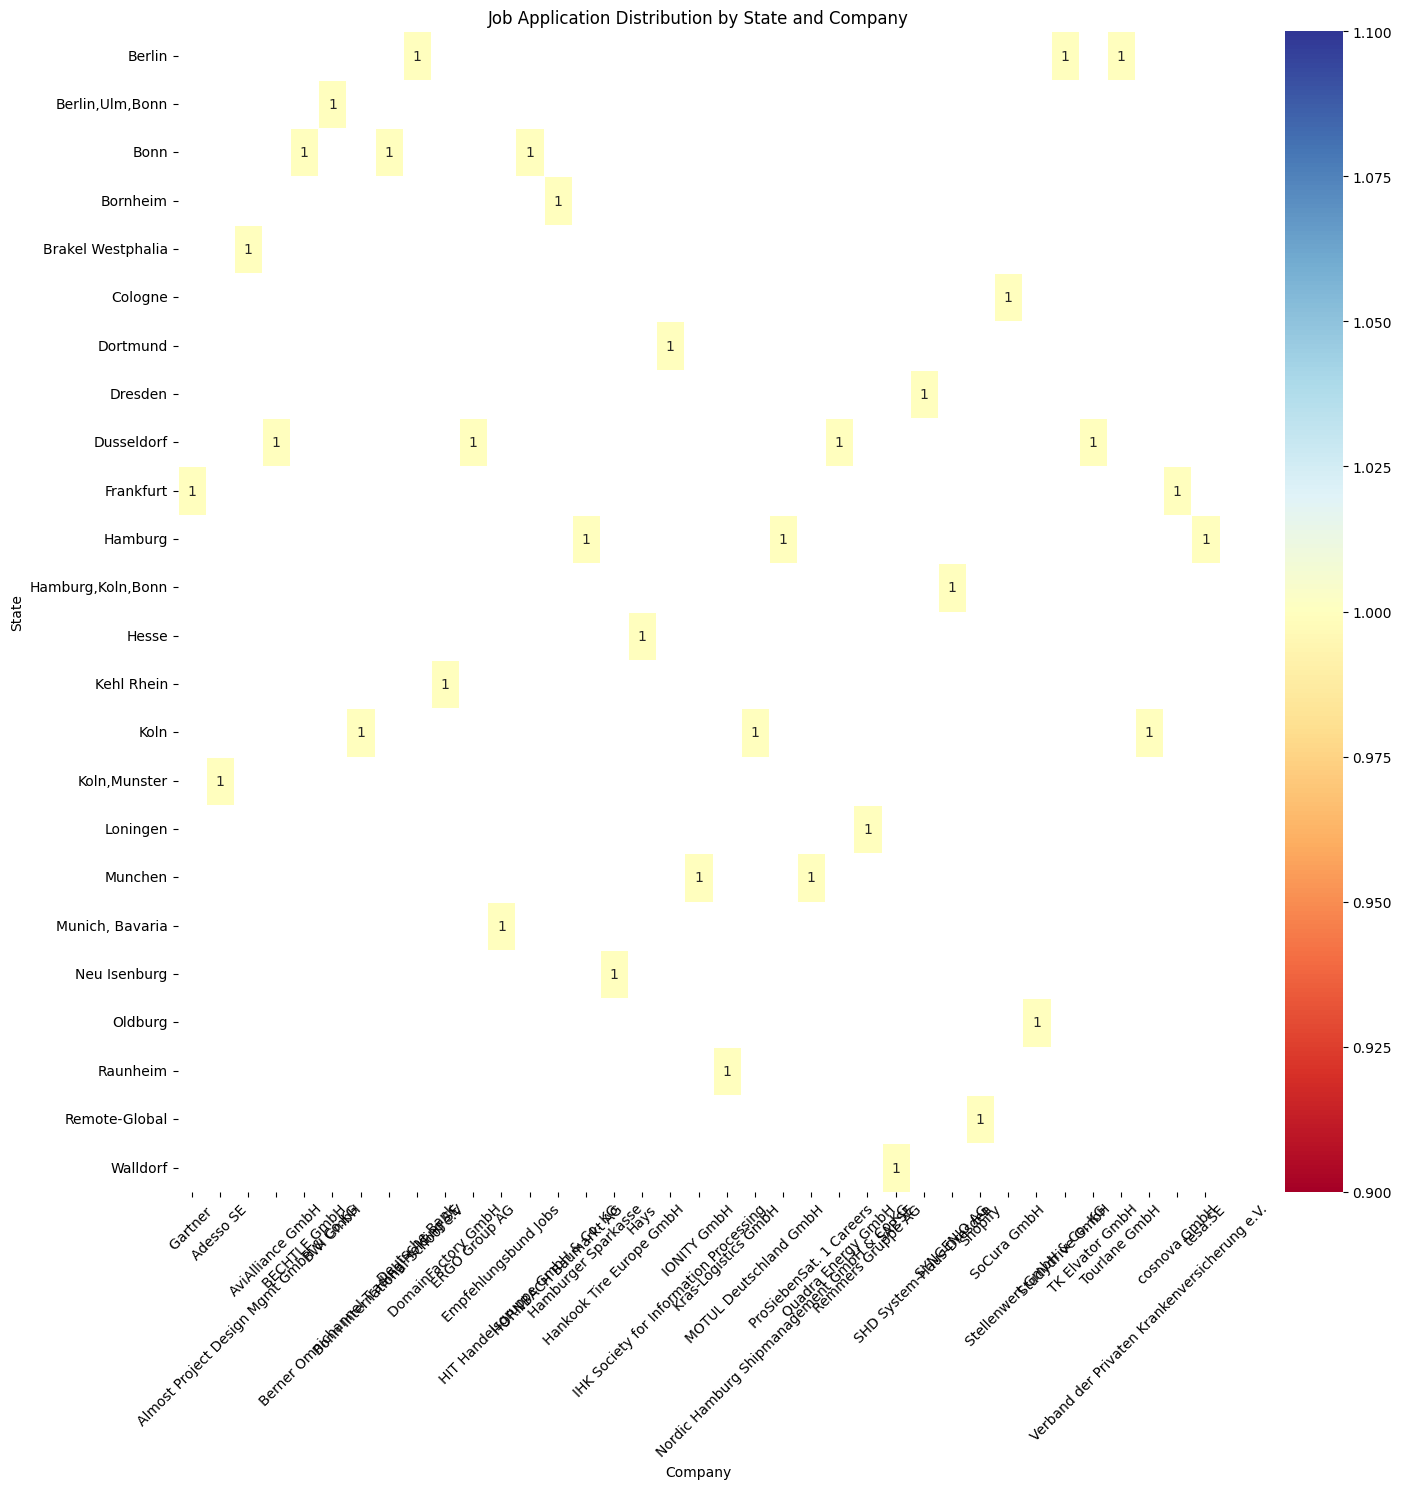

In [118]:
# Correct pivot method call with index, columns, and values
combined_pivot = combined_data.pivot(index='State', columns='Company', values='S.No')

# Group by both 'State' and 'Company' and count applications
combined_data = df.groupby(['State', 'Company'])['S.No'].count().reset_index()

# Pivot the data to create a heatmap-ready format
combined_pivot = combined_data.pivot(index='State', columns='Company', values='S.No')

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(combined_pivot, annot=True, cmap='RdYlBu', linewidths=.5)
plt.title('Job Application Distribution by State and Company')
plt.xlabel('Company')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7.3 Line Chats For Trend Analysis 

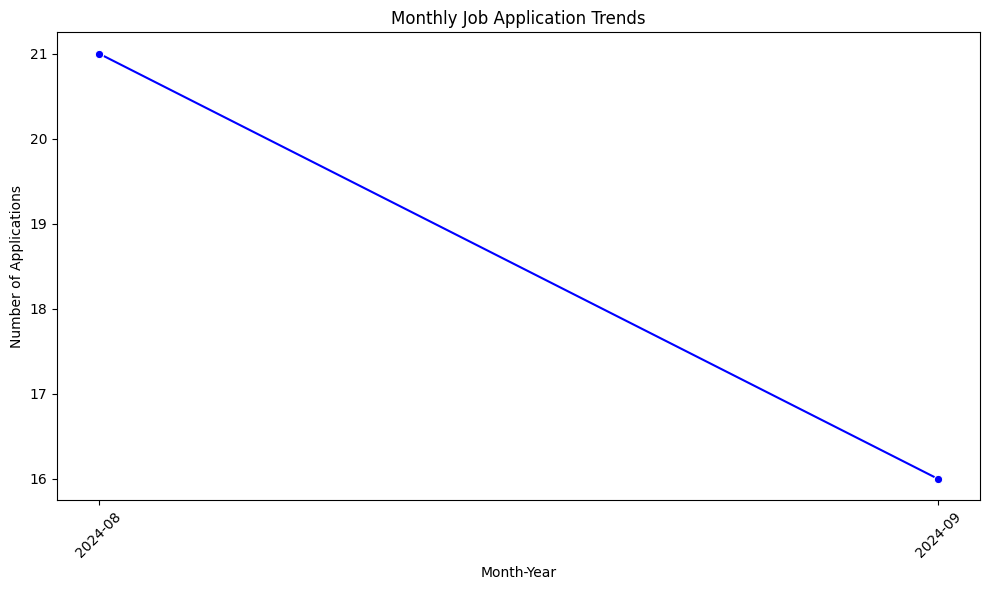

In [93]:
# Convert 'Date' to a datetime object if it is not already
df['Date'] = pd.to_datetime(df['Date'])

# Group by month-year and count the number of applications per month
df['Month_Year'] = df['Date'].dt.to_period('M').astype(str)  # Convert Period to string
monthly_trends = df.groupby('Month_Year')['S.No'].count().reset_index()

# Plotting the line chart for monthly job application trends
plt.figure(figsize=(10,6))
sns.lineplot(x='Month_Year', y='S.No', data=monthly_trends, marker='o', color='b')
plt.title('Monthly Job Application Trends')
plt.xlabel('Month-Year')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


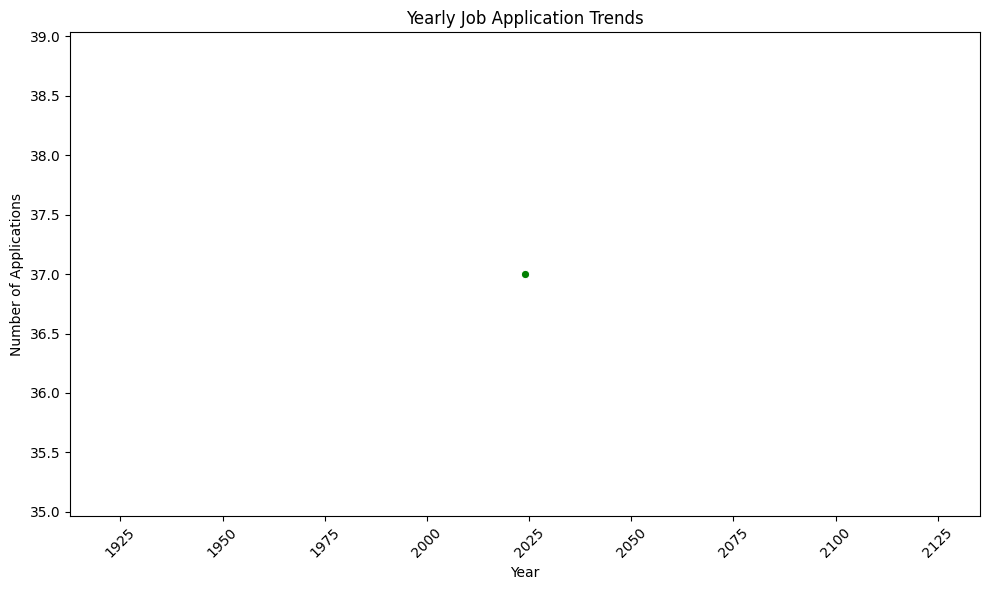

In [94]:
# Group by year and count the number of applications per year
df['Year'] = df['Date'].dt.year
yearly_trends = df.groupby('Year')['Application Status'].count().reset_index()

# Plotting the line chart for yearly job application trends
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Application Status', data=yearly_trends, marker='o', color='g')
plt.title('Yearly Job Application Trends')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

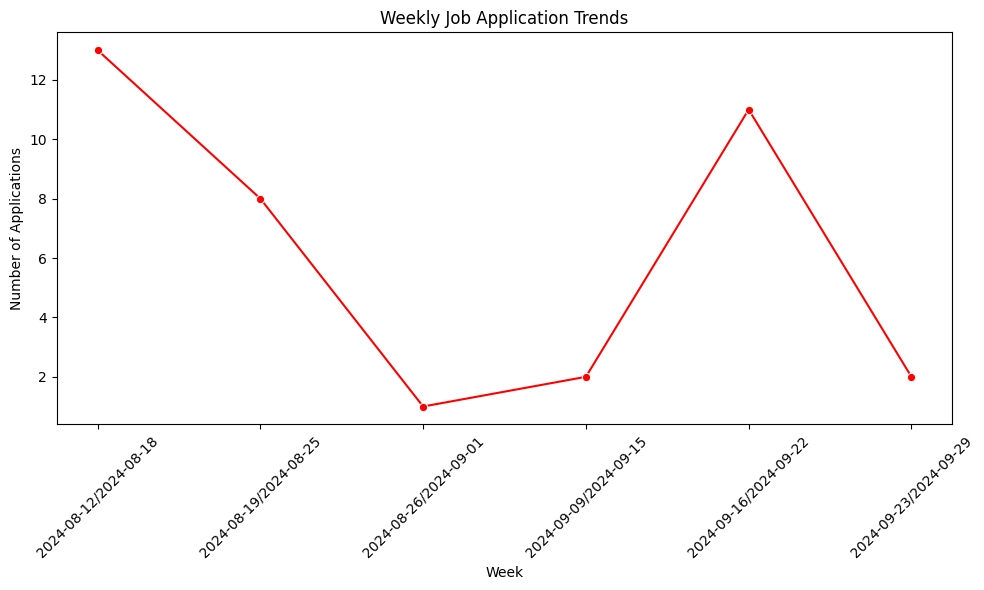

In [95]:
# Group by week and count the number of applications per week
df['Week'] = df['Date'].dt.to_period('W').astype(str)  # Convert Period to string
weekly_trends = df.groupby('Week')['Application Status'].count().reset_index()

# Plotting the line chart for weekly job application trends
plt.figure(figsize=(10,6))
sns.lineplot(x='Week', y='Application Status', data=weekly_trends, marker='o', color='r')
plt.title('Weekly Job Application Trends')
plt.xlabel('Week')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

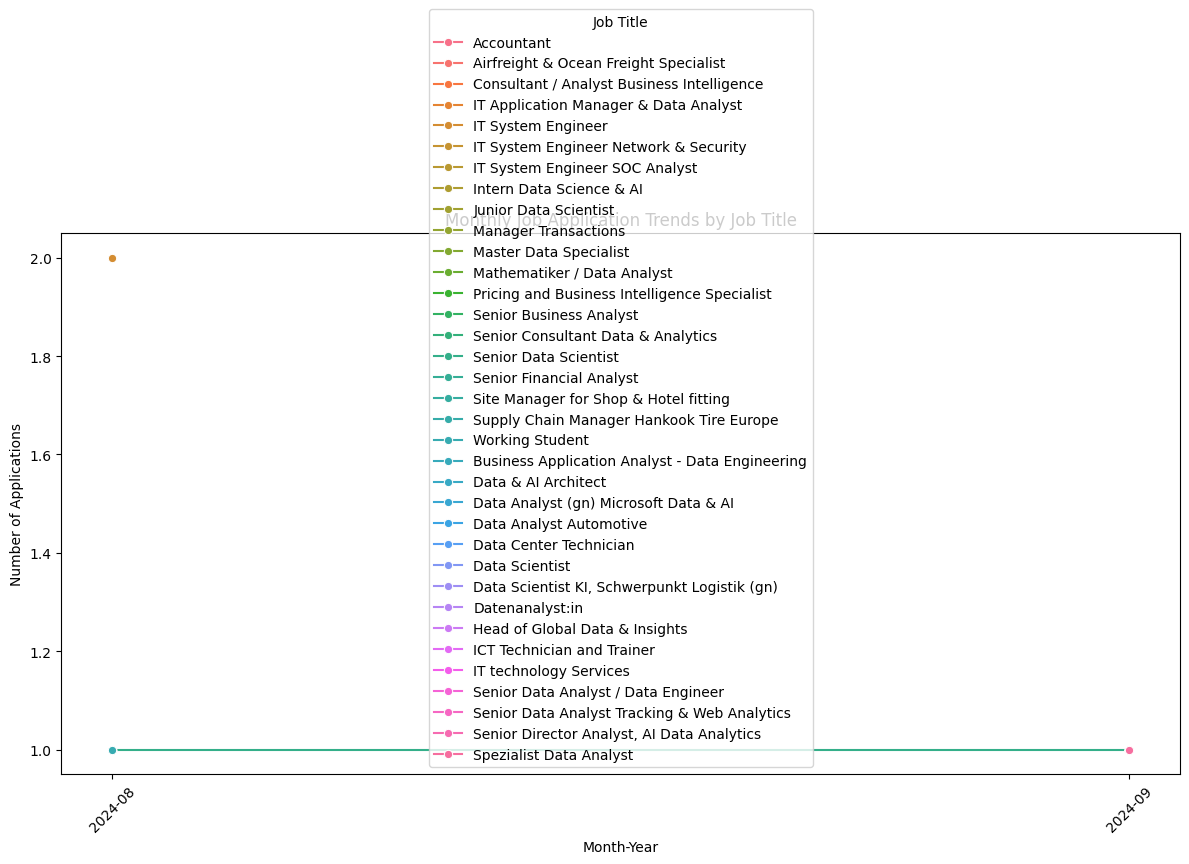

In [96]:
# Group by 'Month_Year' and 'Job_Title' to analyze job applications trends across different job titles
monthly_trends_job_title = df.groupby(['Month_Year', 'Job Title'])['Application Status'].count().reset_index()

# Plotting the line chart with multiple job titles
plt.figure(figsize=(12,8))
sns.lineplot(x='Month_Year', y='Application Status', hue='Job Title', data=monthly_trends_job_title, marker='o')
plt.title('Monthly Job Application Trends by Job Title')
plt.xlabel('Month-Year')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()

**General Explanation:**

Datetime Handling: Using pd.to_datetime() ensures that the Date column is properly formatted. Extracting time components like Month, Year, or Week helps in grouping the data.\
Grouping: The .groupby() function allows aggregating data by time periods or any other category (e.g., job titles).\
Line Plot: sns.lineplot() creates the line chart, and options like hue let you add multiple lines for comparison.\
With these techniques, you can perform detailed trend analysis on your data, whether it's by month, year, or week.

# *May Allah bless my knowledge with abundance and increase it further*